# Library Import

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Dataset import

In [2]:
import kagglehub
import os

In [3]:
# Download latest version
path = kagglehub.dataset_download("vipoooool/new-plant-diseases-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'new-plant-diseases-dataset' dataset.
Path to dataset files: /kaggle/input/new-plant-diseases-dataset


data set verification

In [4]:
from os import listdir
from os.path import isfile, join

In [5]:
print(listdir(path))
dataset_path = join(path, 'New Plant Diseases Dataset(Augmented)','New Plant Diseases Dataset(Augmented)')
print(listdir(dataset_path))
train_path = join(dataset_path,'train')
print(listdir(train_path))
validation_path = join(dataset_path,'valid')
print(listdir(validation_path))

print('Number of classes in train and valid are same is' , len(listdir(train_path)) == len(listdir(validation_path)) )
print("number of class is " , len(listdir(train_path)))


['New Plant Diseases Dataset(Augmented)', 'new plant diseases dataset(augmented)', 'test']
['valid', 'train']
['Tomato___Late_blight', 'Tomato___healthy', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Potato___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Strawberry___Leaf_scorch', 'Peach___healthy', 'Apple___Apple_scab', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Apple___Black_rot', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Peach___Bacterial_spot', 'Apple___Cedar_apple_rust', 'Tomato___Target_Spot', 'Pepper,_bell___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Potato___Late_blight', 'Tomato___Tomato_mosaic_virus', 'Strawberry___healthy', 'Apple___healthy', 'Grape___Black_rot', 'Potato___Early_blight', 'Cherry_(including_sour)___healthy', 'Corn_(

##Data Preprocessing

training image preprossesing

In [6]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


Validation image preprocessing

In [7]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    validation_path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


prepossesing verification

In [8]:
training_set
for x , y in training_set:
  print(x , x.shape)
  print(y , y.shape)
  break

tf.Tensor(
[[[[141.   141.   143.  ]
   [138.   138.   140.  ]
   [135.75 135.75 137.75]
   ...
   [118.   118.   120.  ]
   [114.5  114.5  116.5 ]
   [119.25 119.25 121.25]]

  [[134.   134.   136.  ]
   [134.5  134.5  136.5 ]
   [132.75 132.75 134.75]
   ...
   [122.   122.   124.  ]
   [113.5  113.5  115.5 ]
   [119.75 119.75 121.75]]

  [[129.75 129.75 131.75]
   [132.5  132.5  134.5 ]
   [134.25 134.25 136.25]
   ...
   [110.25 110.25 112.25]
   [117.25 117.25 119.25]
   [116.5  116.5  118.5 ]]

  ...

  [[129.75 134.75 137.75]
   [123.75 128.75 131.75]
   [122.   127.   130.  ]
   ...
   [108.5  112.5  111.5 ]
   [111.   115.   114.  ]
   [108.25 112.25 111.25]]

  [[124.75 129.75 132.75]
   [123.25 128.25 131.25]
   [123.75 128.75 131.75]
   ...
   [ 99.5  103.5  102.5 ]
   [103.25 107.25 106.25]
   [107.75 111.75 110.75]]

  [[126.   131.   134.  ]
   [129.   134.   137.  ]
   [127.   132.   135.  ]
   ...
   [105.5  109.5  108.5 ]
   [108.   112.   111.  ]
   [106.   110.   10

In [9]:
validation_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

#Build Model

In [10]:
from tensorflow.keras.layers import Dense , Conv2D , MaxPooling2D , Flatten , Dropout
from tensorflow.keras.models import Sequential as seq

In [11]:
model = seq()

#building layer
a ml model contains a number of layers
* convolution layer
* pooling
* dense layer - output

In [12]:
model.add(Conv2D(filters=32 , kernel_size= 3 , padding='same' , activation='relu' , input_shape=(128,128,3)) )
model.add(Conv2D(filters=32 , kernel_size= 3  , activation='relu' ))
model.add(MaxPooling2D(pool_size=2 , strides = 2))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.add(Conv2D(filters=64 , kernel_size= 3 , padding='same' , activation='relu' , input_shape=(128,128,3)) )
model.add(Conv2D(filters=64 , kernel_size= 3 , activation='relu' ))
model.add(MaxPooling2D(pool_size=2 , strides = 2))

In [14]:
model.add(Conv2D(filters=128 , kernel_size= 3 , padding='same' , activation='relu' , input_shape=(128,128,3)) )
model.add(Conv2D(filters=128 , kernel_size= 3 , activation='relu' ))
model.add(MaxPooling2D(pool_size=2 , strides = 2))

In [15]:
model.add(Conv2D(filters= 256 , kernel_size= 3 , padding='same' , activation='relu' , input_shape=(128,128,3)) )
model.add(Conv2D(filters= 256 , kernel_size= 3 , activation='relu' ))
model.add(MaxPooling2D(pool_size=2 , strides = 2))

In [16]:
model.add(Conv2D(filters= 512 , kernel_size= 3 , padding='same' , activation='relu' , input_shape=(128,128,3)) )
model.add(Conv2D(filters= 512 , kernel_size= 3 , activation='relu' ))
model.add(MaxPooling2D(pool_size=2 , strides = 2))

In [17]:
model.add(Dropout(0.25)) # to avoid over fitting

In [18]:
model.add(Flatten())
# after pooling , all the matrix are flattened to a 1d array

In [19]:
model.add(Dense(units=1500 , activation='relu')) # 1500 represent the number of nurons

In [20]:
model.add(Dropout(0.4))

In [21]:
model.add(Dense(units= 38 , activation='softmax')) # 38 represen the number of classes - number of class in the dataset

#Compiling Model

In [22]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate = 0.0001) , loss='categorical_crossentropy' , metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

upto this , model architecture completed

#Model training

In [24]:
training_record = model.fit(x = training_set , validation_data= validation_set , epochs= 10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 257s 110ms/step - accuracy: 0.3966 - loss: 2.1330 - val_accuracy: 0.8261 - val_loss: 0.5611
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 134s 61ms/step - accuracy: 0.8353 - loss: 0.5188 - val_accuracy: 0.9129 - val_loss: 0.2768
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 135s 61ms/step - accuracy: 0.9030 - loss: 0.2977 - val_accuracy: 0.9427 - val_loss: 0.1807
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 138s 63ms/step - accuracy: 0.9356 - loss: 0.1949 - val_accuracy: 0.9499 - val_loss: 0.1556
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 139s 61ms/step - accuracy: 0.9495 - loss: 0.1533 - val_accuracy: 0.9515 - val_loss: 0.1573
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 134s 61ms/step - accuracy: 0.9621 - loss: 0.1152 - val_accuracy: 0.9655 - val_loss: 0.1101
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 135s 61ms/step - accuracy: 0.9689 - loss: 0.0930 - val_accuracy: 0.9609 - val_loss: 0.1196
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 134s 61ms/step - accuracy:

#Model Evaluvation

In [25]:
train_loss , train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 72s 33ms/step - accuracy: 0.9899 - loss: 0.0309


In [26]:
print(train_loss , train_acc)

0.029282135888934135 0.9902696013450623


In [27]:
train_loss , train_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 18s 33ms/step - accuracy: 0.9643 - loss: 0.1227


In [28]:
print(train_loss , train_acc)

0.11835002899169922 0.9656840562820435


#Save Model

In [38]:
from datetime import date

date = date.today()
save_path = 'plant_disease_model_' + str(date) + '.keras'
save_path = save_path.replace('-' , '_')
save_path

'plant_disease_model_2025_11_09.keras'

In [39]:
model.save(save_path)

In [41]:
training_record.history

{'accuracy': [0.5963866710662842,
  0.8586101531982422,
  0.9134219884872437,
  0.9408919811248779,
  0.9539085030555725,
  0.9633402228355408,
  0.9713919758796692,
  0.9763709902763367,
  0.9804396033287048,
  0.9811366200447083],
 'loss': [1.3644318580627441,
  0.44226208329200745,
  0.2661948502063751,
  0.1805799901485443,
  0.14104413986206055,
  0.11089068651199341,
  0.08782419562339783,
  0.07216696441173553,
  0.06216059625148773,
  0.056207407265901566],
 'val_accuracy': [0.8261438608169556,
  0.9128727316856384,
  0.9427498579025269,
  0.9499203562736511,
  0.9514568448066711,
  0.9654564261436462,
  0.9609037041664124,
  0.9653995037078857,
  0.9650011658668518,
  0.9656840562820435],
 'val_loss': [0.561090350151062,
  0.2767525911331177,
  0.1807185560464859,
  0.15556226670742035,
  0.15731342136859894,
  0.11010964959859848,
  0.11956086754798889,
  0.11272358894348145,
  0.11450705677270889,
  0.11835001409053802]}

#Download the model

In [40]:
from google.colab import files

files.download(save_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#record history in json

In [42]:
import json
with open('training_record_'+str(date)+'.json' , 'w') as f:
  json.dump(training_record.history , f)


In [43]:
files.download('training_record_'+str(date)+'.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Visualization

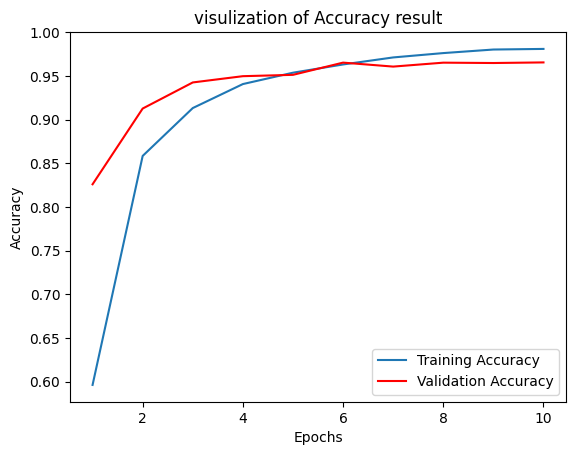

In [46]:
epochs = [i for i in range(1,11)]
plt.plot(epochs , training_record.history['accuracy'] , label='Training Accuracy')
plt.plot(epochs , training_record.history['val_accuracy'] , label='Validation Accuracy' , color = 'red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('visulization of Accuracy result')
plt.show()